# Problem statement

In [1]:
# neccessary imports
import pandas as pd
import numpy as np   
%matplotlib inline 

In [5]:
# reading the data
data=pd.read_csv("insuranceFraud.csv")
data.shape 

(1000, 39)

In [95]:
# Having a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [97]:
data.T 

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328,228,134,256,228,256,137,165,27,212,...,286,257,94,124,141,3,285,130,458,456
age,48,42,29,41,44,39,34,37,33,42,...,43,44,26,28,30,38,41,34,62,60
policy_number,521585,342868,687698,227811,367455,104594,413978,429027,485665,636550,...,663190,109392,215278,674570,681486,941851,186934,918516,533940,556080
policy_bind_date,10/17/2014,6/27/2006,9/6/2000,5/25/1990,6/6/2014,10/12/2006,6/4/2000,2/3/1990,2/5/1997,7/25/2011,...,2/5/1994,7/12/2006,10/24/2007,12/8/2001,3/24/2007,7/16/1991,1/5/2014,2/17/2003,11/18/2011,11/11/1996
policy_state,OH,IN,OH,IL,IL,OH,IN,IL,IL,IL,...,IL,OH,IN,OH,IN,OH,IL,OH,IL,OH
policy_csl,250/500,250/500,100/300,250/500,500/1000,250/500,250/500,100/300,100/300,100/300,...,100/300,100/300,100/300,250/500,500/1000,500/1000,100/300,250/500,500/1000,250/500
policy_deductable,1000,2000,2000,2000,1000,1000,1000,1000,500,500,...,500,1000,500,1000,1000,1000,1000,500,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0,5000000,5000000,6000000,6000000,0,0,0,0,0,...,3000000,0,0,0,0,0,0,3000000,5000000,0
insured_zip,466132,468176,430632,608117,610706,478456,441716,603195,601734,600983,...,477644,433981,433696,443567,430665,431289,608177,442797,441714,612260


In [99]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
data=data.replace('?',np.nan) 

In [101]:
# list of columns not necessary for prediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [103]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [105]:
# checking the data after dropping the columns
data.head() 

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [107]:
# checking for missing values
data.isna().sum() 

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [109]:
# checking for th number of categorical and numerical columns
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [111]:
# filling nan values with most frequent category
data['collision_type']=data['collision_type'].fillna('Rear Collision') 

In [113]:
data['police_report_available']=data['police_report_available'].fillna('NO') 

In [115]:
data['property_damage']=data['property_damage'].fillna('NO') 

In [117]:
# Extracting the categorical columns
cat_df = data.select_dtypes(include=['object']).copy() 

In [119]:
cat_df.columns 

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [121]:
cat_df.head() 

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO,N


Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one

In [124]:
cat_df.columns 

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [126]:
cat_df['policy_csl'].unique()  

array(['250/500', '100/300', '500/1000'], dtype=object)

In [128]:
cat_df['insured_education_level'].unique() 

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [130]:
cat_df['incident_severity'].unique() 

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [132]:
cat_df['property_damage'].unique() 

array(['YES', 'NO'], dtype=object)

In [134]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1}) 

In [136]:
# auto encoding of categorical variables
for col in cat_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [138]:
# data fter encoding
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,2.5,1,6,2,0,0,1,False,False,False,...,False,False,False,False,True,True,False,False,False,True
2,1.0,0,7,2,0,0,0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,2.5,0,7,3,0,0,1,True,False,False,...,True,False,False,True,False,False,False,False,False,True
4,5.0,1,5,2,0,0,0,False,False,False,...,True,False,False,False,True,True,False,False,False,False


In [140]:
# extracting the numerical columns
num_df = data.select_dtypes(include=['int64']).copy()  

In [142]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [144]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [166]:
print(num_df.head())
print(num_df['umbrella_limit'].dtype)
print(num_df['umbrella_limit'].isnull().sum()) 

   months_as_customer  age  policy_deductable  umbrella_limit  capital-gains  \
0                 328   48               1000               0          53300   
1                 228   42               2000         5000000              0   
2                 134   29               2000         5000000          35100   
3                 256   41               2000         6000000          48900   
4                 228   44               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0      

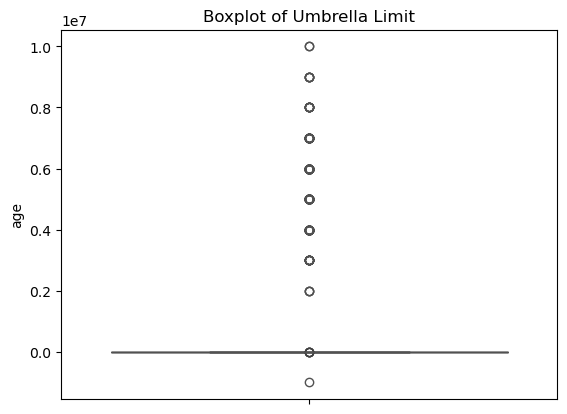

In [168]:
sns.boxplot(y=num_df['umbrella_limit'])  # vertical boxplot
plt.title("Boxplot of Umbrella Limit")
plt.show() 

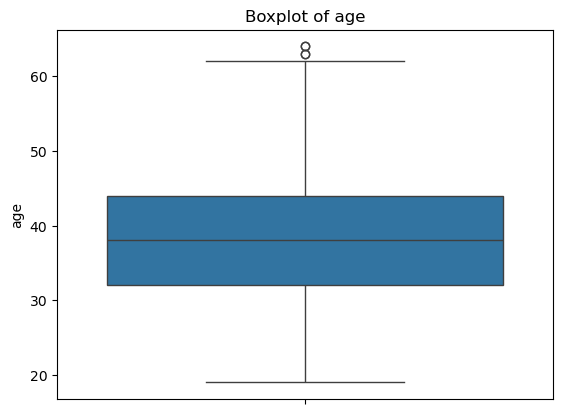

In [170]:
sns.boxplot(y=num_df['age'])  # vertical boxplot
plt.title("Boxplot of age")
plt.show()   

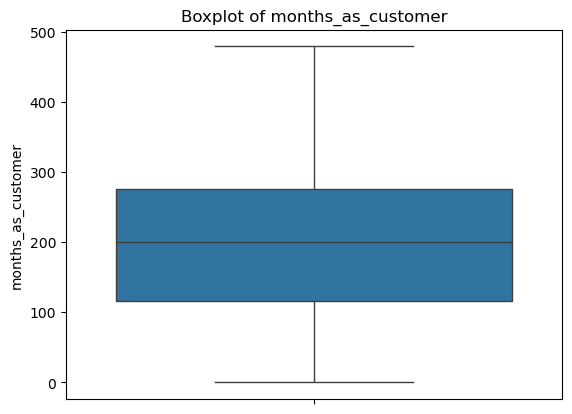

In [172]:
sns.boxplot(y=num_df['months_as_customer'])  # vertical boxplot
plt.title("Boxplot of months_as_customer")
plt.show() 

In [174]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)  

In [176]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,False,False,False,True,False,False,True,False,False,True
1,228,42,2000,5000000,0,0,8,1,0,0,...,False,False,False,False,True,True,False,False,False,True
2,134,29,2000,5000000,35100,0,7,3,2,3,...,False,False,False,False,False,True,False,False,False,True
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,True,False,False,True,False,False,False,False,False,True
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,True,False,False,False,True,True,False,False,False,False


In [178]:
# separating the feature and target columns
x=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported'] 

In [180]:
import matplotlib.pyplot as plt
%matplotlib  inline 

In [182]:
# we'll look at the distribution of data in some columns now
counts=final_df['policy_csl'].value_counts()
plt.hist(counts) 
# we  can see that for almost all categories of CSL the data is uniformly distributed  

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([300. , 305.1, 310.2, 315.3, 320.4, 325.5, 330.6, 335.7, 340.8,
        345.9, 351. ]),
 <BarContainer object of 10 artists>)

In [184]:
import seaborn as sns  

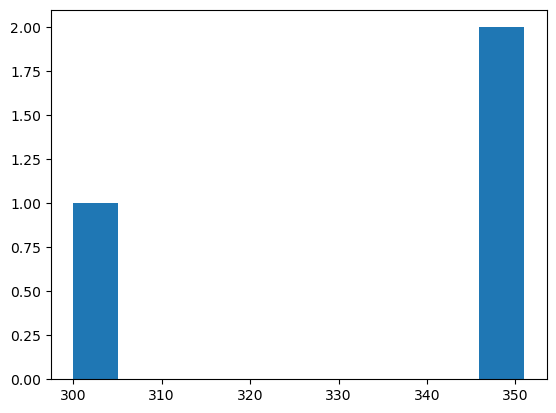

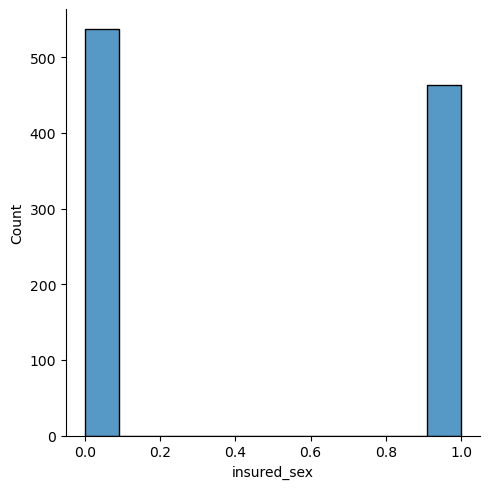

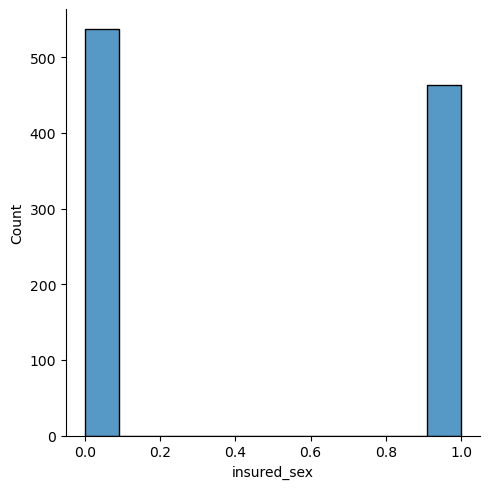

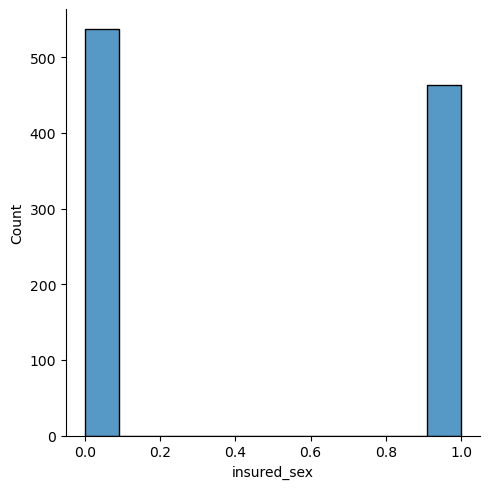

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(final_df['insured_sex'])
plt.show()
# we  can see that for almost all categories of the gender of the insured the data is uniformly distributed 

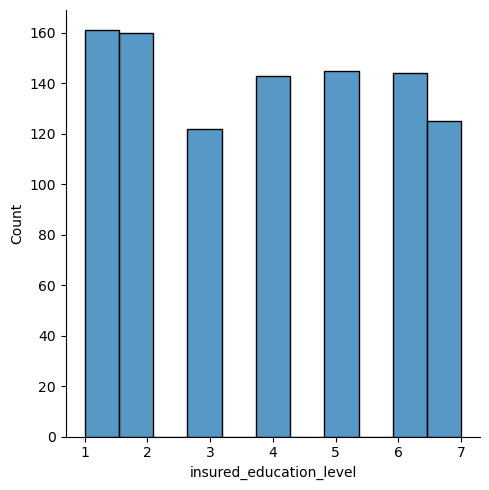

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(final_df['insured_education_level'])
plt.show()
# we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

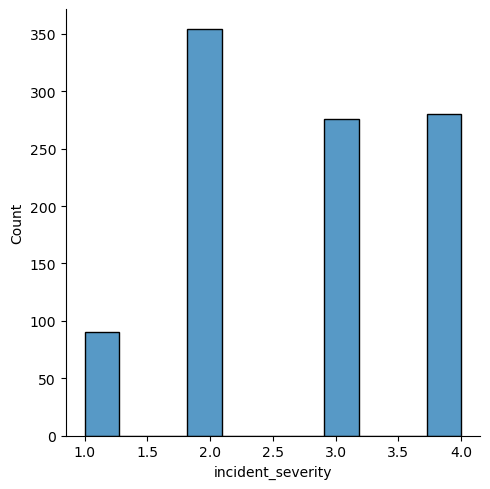

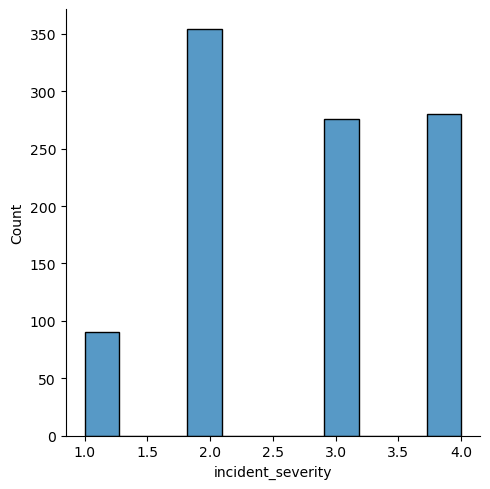

In [196]:
sns.displot(final_df['incident_severity'])
plt.show() 

In [79]:


 """
We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.
"""


'\nWe can see that there are least claims for trivial incidents,\nmost claims for minor incidents,\nand for major and Total loss incidents the claims are almost equal.\n'

In [83]:
num_df.columns 

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

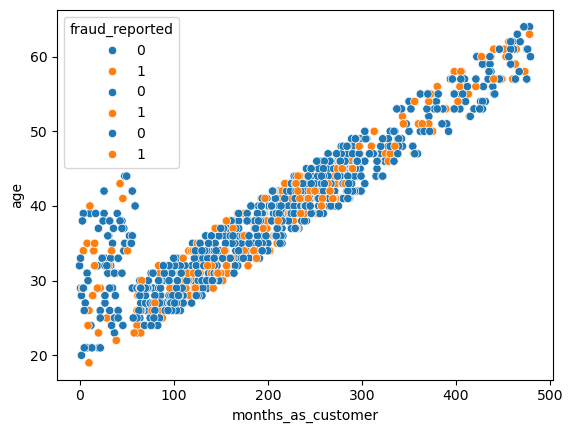

In [204]:
sns.scatterplot(x=final_df['months_as_customer'],y=final_df['age'], hue=final_df['fraud_reported'])
plt.show() 

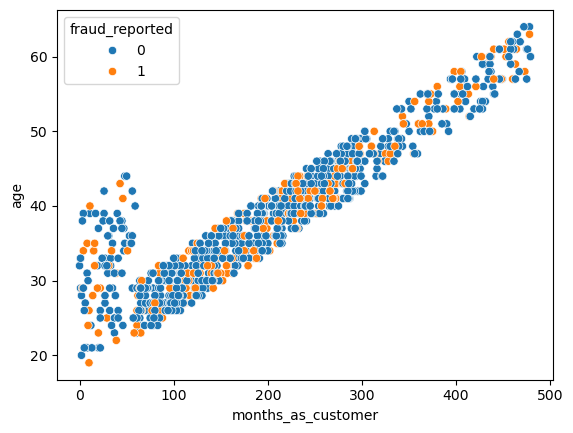

In [206]:
sns.scatterplot(x=final_df['months_as_customer'],y=final_df['age'], hue=final_df['fraud_reported'] )
plt.show()  
# from the graph it can be concluded that most of the fraud cases are done by the customers new 
# to the company and that too comparatively younger ones. 
 

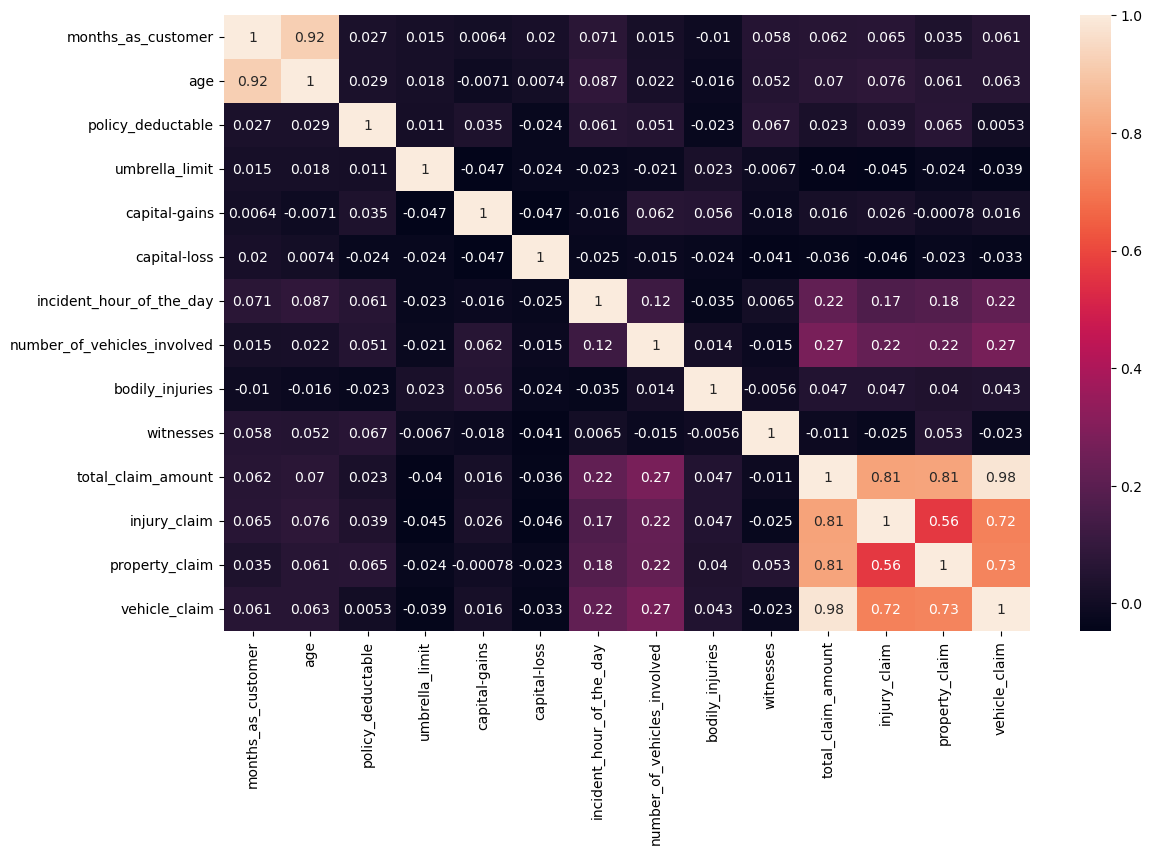

In [208]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )
plt.show() 

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [52]:
x.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces_1',
       'insured_occupation_craft-repair_1',
       'insured_occupation_exec-managerial_1',
       'insured_occupation_farming-fishing_1',
       'insured_occupation_handlers-cleaners_1',
       'insured_occupation_machine-op-inspct_1',
       'insured_occupation_other-service_1',
       'insured_occupation_priv-house-serv_1',
       'insured_occupation_prof-specialty_1',
       'insured_occupation_protective-serv_1', 'insured_occupation_sales_1',
       'insured_occupation_tech-support_1',
       'insured_occupation_tran

In [210]:
x.drop(columns=['age','total_claim_amount'], inplace=True) 

In [212]:
# splitting the data for model training

# splitting the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 )

In [213]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
65,254,500,0,35700,0,6,3,2,2,13720,...,False,False,False,False,False,False,False,False,False,False
244,95,1000,0,0,-70300,3,1,1,2,640,...,False,False,False,False,True,True,False,False,False,False
595,56,500,0,0,-28800,13,1,1,2,0,...,False,False,False,True,False,True,False,False,False,True
873,322,2000,0,0,-46000,18,1,0,2,7680,...,False,False,False,True,False,True,False,False,False,False
631,147,1000,6000000,0,-48400,2,2,1,2,9760,...,False,False,False,False,False,True,False,False,True,False


In [216]:
num_df=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [220]:
num_df.columns 

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [222]:
print(train_x.shape)
print(num_df.shape) 

(750, 44)
(750, 12)


In [224]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [226]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(750, 12)

In [228]:
scaled_num_df.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [230]:
train_x.drop(columns=scaled_num_df.columns, inplace=True)

In [232]:
train_x.shape

(750, 32)

In [234]:
train_x.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
65,1.0,0,6,2,1,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
244,2.5,1,5,1,1,0,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
595,1.0,1,1,3,1,1,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True
873,2.5,0,7,3,0,1,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
631,5.0,0,5,4,0,0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [236]:
train_x=pd.concat([scaled_num_df,train_x],axis=1) 

In [238]:
from sklearn.linear_model import LogisticRegression
logis=LogisticRegression() 

In [240]:
y_pred = logis.fit(train_x, train_y).predict(test_x)

In [242]:
from sklearn.metrics import accuracy_score

In [244]:
logis=accuracy_score(test_y,y_pred)
logis

0.36

In [246]:
from sklearn.tree import DecisionTreeClassifier
Dt=DecisionTreeClassifier()
y_pred_Dt = Dt.fit(train_x, train_y).predict(test_x)

In [248]:
Dt=accuracy_score(test_y,y_pred_Dt)
Dt

0.472

In [250]:
#train_x[:20]

In [252]:
#train_x.isna().sum()

In [254]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()


In [256]:
y_pred = Rf.fit(train_x, train_y).predict(test_x)

In [258]:
Rf=accuracy_score(test_y,y_pred) 
Rf 

0.72

In [260]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier()
y_pred = Ada.fit(train_x, train_y).predict(test_x)
Ada=accuracy_score(test_y,y_pred) 
Ada 


C:\Users\abcd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.516

In [262]:
from sklearn.ensemble import GradientBoostingClassifier
Grad=GradientBoostingClassifier()
y_pred = Grad.fit(train_x, train_y).predict(test_x)
Grad=accuracy_score(test_y,y_pred) 
Grad 

0.704